In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [4]:
# Hyper Parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.01
DOWNLOAD_MNIST = True

In [5]:
train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=DOWNLOAD_MNIST
)

100.1%

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


113.5%

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


100.4%

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


180.4%

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/home/neu/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729128610/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


In [9]:
print(train_data.targets.size())

torch.Size([60000])


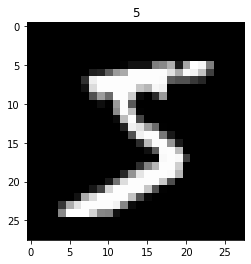

In [12]:
plt.imshow(train_data.data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

In [14]:
train_loader = Data.DataLoader(dataset=train_data, 
                               batch_size=BATCH_SIZE, 
                               shuffle=True,
                               num_workers=2
                              )

In [15]:
test_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=False
)

In [17]:
test_x = Variable(torch.unsqueeze(test_data.data, dim=1), volatile=True).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets[:2000]

/home/neu/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  """Entry point for launching an IPython kernel.


In [18]:
test_x = Variable(torch.unsqueeze(test_data.data, dim=1)).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.targets[:2000]

In [28]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d( #(1,28,28)
                in_channels=1,#输入数据通道数
                out_channels=16, #输出通道数
                kernel_size=5, #卷积核大小
                stride=1,#布长
                padding=2 #填充,默认用0填充
            ),#(16, 28,28)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2), #(16, 14, 14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d( #(16, 14,14)
                in_channels=16,#输入数据通道数
                out_channels=32, #输出通道数
                kernel_size=5, #卷积核大小
                stride=1,#布长
                padding=2 #填充,默认用0填充
            ), #(32, 14,14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),#(32,7,7)
        )
        self.out = nn.Linear(32*7*7, 10) 
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) #(batch, 32,7,7)
        x = x.view(x.size(0), -1) #(x.size(0):batch, -1:32*7*7)
        output = self.out(x)
        return output

In [29]:
cnn = CNN()

In [30]:
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [31]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [32]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        out = cnn(b_x)
        loss = loss_func(out, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output = cnn(test_x)
#             pred_y = torch.max(nn.functional.softmax(test_output), 1)[1].data.numpy().squeeze()
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y == test_y) / test_y.size(0)
            print("Epoch: ", epoch, "| train loss: %.4f" % loss.item(), "| test accuracy: %.4f" % accuracy.data)

Epoch:  0 | train loss: 2.2924 | test accuracy: 0.1025
Epoch:  0 | train loss: 0.2180 | test accuracy: 0.8955
Epoch:  0 | train loss: 0.3194 | test accuracy: 0.9335
Epoch:  0 | train loss: 0.2141 | test accuracy: 0.9410
Epoch:  0 | train loss: 0.1053 | test accuracy: 0.9550
Epoch:  0 | train loss: 0.1258 | test accuracy: 0.9430
Epoch:  0 | train loss: 0.0473 | test accuracy: 0.9515
Epoch:  0 | train loss: 0.1626 | test accuracy: 0.9640
Epoch:  0 | train loss: 0.0161 | test accuracy: 0.9650
Epoch:  0 | train loss: 0.0266 | test accuracy: 0.9550
Epoch:  0 | train loss: 0.0377 | test accuracy: 0.9545
Epoch:  0 | train loss: 0.0150 | test accuracy: 0.9675
Epoch:  0 | train loss: 0.1650 | test accuracy: 0.9660
Epoch:  0 | train loss: 0.0407 | test accuracy: 0.9660
Epoch:  0 | train loss: 0.1689 | test accuracy: 0.9745
Epoch:  0 | train loss: 0.0124 | test accuracy: 0.9680
Epoch:  0 | train loss: 0.1699 | test accuracy: 0.9695
Epoch:  0 | train loss: 0.1051 | test accuracy: 0.9685
Epoch:  0 

In [33]:
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, ' prediction number')
print(test_y[:10].numpy(), ' real number')

[7 2 1 0 4 1 4 4 5 9]  prediction number
[7 2 1 0 4 1 4 9 5 9]  real number


In [34]:
test_output = cnn(test_x[:10])
test_output

tensor([[-11.6490,  -8.5891,  -1.6824,  -0.5803, -10.3914, -10.0280, -24.8918,
          10.3321,  -9.0635,  -0.6888],
        [ -0.8091,   0.8075,   7.5679,  -7.7060,  -8.1374, -14.6146,  -0.8192,
         -14.8173,  -2.4590, -12.2183],
        [-10.3781,   5.3311,  -7.6696,  -7.0499,  -2.1145,  -8.3859,  -5.1872,
           0.7285,  -1.8962,  -7.5638],
        [  6.7858, -15.4486,  -7.5357, -12.3111,  -3.9949,  -5.3369,   1.0636,
          -8.1586,  -4.5700,  -4.1675],
        [-10.1810, -11.2732,  -9.6065, -12.6780,  10.8733,  -9.2657, -11.3191,
          -8.1329,  -4.7198,  -2.0724],
        [-10.1526,   7.0709,  -4.9422,  -7.9375,  -3.4374, -12.5205,  -7.1702,
           0.3469,  -2.1806,  -7.8051],
        [-21.7420,  -6.4127, -11.6916, -13.6267,  12.0121,  -5.3986, -13.1657,
         -10.8029,   0.1489,  -5.0479],
        [-10.0096,  -9.1435,  -6.4197,  -7.6051,   5.5048,  -2.3329,  -9.8062,
          -7.0042,  -2.2135,   5.3481],
        [ -6.6513, -19.3800, -16.5064, -10.9178,

In [37]:
y = torch.max(test_output, dim=1)
y

torch.return_types.max(
values=tensor([10.3321,  7.5679,  5.3311,  6.7858, 10.8733,  7.0709, 12.0121,  5.5048,
         4.2104,  9.6648], grad_fn=<MaxBackward0>),
indices=tensor([7, 2, 1, 0, 4, 1, 4, 4, 5, 9]))

In [38]:
y[1]

tensor([7, 2, 1, 0, 4, 1, 4, 4, 5, 9])